In [1]:
import pandas as pd
import numpy as np

In [2]:
fao = pd.read_csv('../data/FAOSTAT_data_8-28-2020.csv', low_memory=False)
wfp = pd.read_csv('../data/wfpvam_foodprices.csv', low_memory=False)

In [3]:
fao.sample(5)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
22714,PP,Producer Prices,33,Canada,5532,Producer Price (USD/tonne),592,Kiwi fruit,2001,2001,7021,Annual value,USD,927.2,NaN,Official data
113666,PP,Producer Prices,189,Saint Lucia,5532,Producer Price (USD/tonne),358,Cabbages and other brassicas,2003,2003,7021,Annual value,USD,1185.2,NaN,Official data
61202,PP,Producer Prices,102,Iran (Islamic Republic of),5532,Producer Price (USD/tonne),951,"Milk, whole fresh buffalo",2003,2003,7021,Annual value,USD,310.0,NaN,Official data
69540,PP,Producer Prices,112,Jordan,5532,Producer Price (USD/tonne),987,"Wool, greasy",1996,1996,7021,Annual value,USD,1100.1,NaN,Official data
22089,PP,Producer Prices,32,Cameroon,5532,Producer Price (USD/tonne),661,"Cocoa, beans",2007,2007,7021,Annual value,USD,1335.4,NaN,Official data


In [4]:
fao.Item.value_counts()[:10]

Tomatoes                        2859
Maize                           2755
Potatoes                        2737
Eggs, hen, in shell             2736
Milk, whole fresh cow           2682
Meat live weight, cattle        2625
Meat live weight, chicken       2494
Cabbages and other brassicas    2394
Meat, cattle                    2315
Onions, dry                     2282
Name: Item, dtype: int64

In [5]:
food_avgs = wfp.groupby(['cm_name', 'mp_year'])['mp_price'].mean().unstack()

In [6]:
food_avgs.describe()

mp_year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,3.000000,3.000000,4.000000,4.000000,10.000000,12.000000,16.000000,17.000000,21.000000,21.000000,...,3.050000e+02,3.560000e+02,3.940000e+02,4.280000e+02,4.640000e+02,4.380000e+02,4.530000e+02,4.770000e+02,4.890000e+02,6.860000e+02
mean,108.648870,110.986408,83.327626,81.113417,70.184455,194.786743,304.387529,43049.442326,33828.693594,29926.688859,...,2.166988e+04,2.931703e+04,2.773986e+04,2.596866e+04,1.859602e+04,2.100593e+04,1.183745e+04,1.552961e+04,1.509468e+04,1.241542e+04
std,80.395104,67.566057,81.709494,83.226532,82.372694,364.319453,526.061464,144777.649348,130079.939218,113533.083289,...,3.150272e+05,3.498963e+05,3.418829e+05,3.383417e+05,2.005981e+05,2.214975e+05,1.029830e+05,1.487983e+05,1.231499e+05,8.798828e+04
min,58.695652,69.988636,1.527500,1.555000,1.322667,1.332500,1.688333,1.773333,1.110000,1.695000,...,1.600000e-01,4.370833e-01,2.664304e-01,4.512140e-01,4.524306e-01,2.485333e-01,1.700000e-01,2.316200e-01,2.422381e-01,1.866667e-01
25%,62.278861,71.994318,46.827188,44.567321,9.450700,5.094026,8.634119,9.633649,8.320890,8.404911,...,3.050000e+01,5.082443e+01,4.842211e+01,4.421568e+01,4.718272e+01,4.836250e+01,4.769313e+01,5.906708e+01,7.644073e+01,1.252021e+02
50%,65.862069,74.000000,67.697057,62.324334,51.549668,75.625643,111.487939,160.506024,171.372093,170.000000,...,2.316310e+02,3.987898e+02,4.430582e+02,4.604909e+02,4.261464e+02,3.647831e+02,3.478150e+02,3.982944e+02,5.263739e+02,7.650271e+02
75%,133.625479,131.485294,104.197496,98.870430,73.387636,118.528898,170.299842,1853.018868,1380.733333,1253.000000,...,1.341221e+03,1.800342e+03,2.050629e+03,2.919290e+03,2.451725e+03,2.293162e+03,2.419247e+03,2.583303e+03,3.013472e+03,3.400473e+03
max,201.388889,188.970588,196.388889,198.250000,255.763889,1225.000000,1668.098765,590833.500000,592625.000000,516000.000000,...,5.500053e+06,6.206308e+06,6.504234e+06,6.731328e+06,3.475853e+06,3.453254e+06,2.027340e+06,3.003641e+06,2.268161e+06,1.506778e+06


In [9]:
def fao_global_averages(data, food):
    '''
    take the FAO food prices table and a specific food
    return a Series representing the average global price per year
    '''
    prices = data[data.Item == food]
    return prices.groupby('Year').Value.mean()    

In [10]:
toms_avg = fao_global_averages(fao, 'Tomatoes')
maize_avg = fao_global_averages(fao, 'Maize')
pots_avg = fao_global_averages(fao, 'Potatoes')
milk_avg = fao_global_averages(fao, 'Milk, whole fresh cow')
beef_avg = fao_global_averages(fao, 'Meat live weight, cattle')

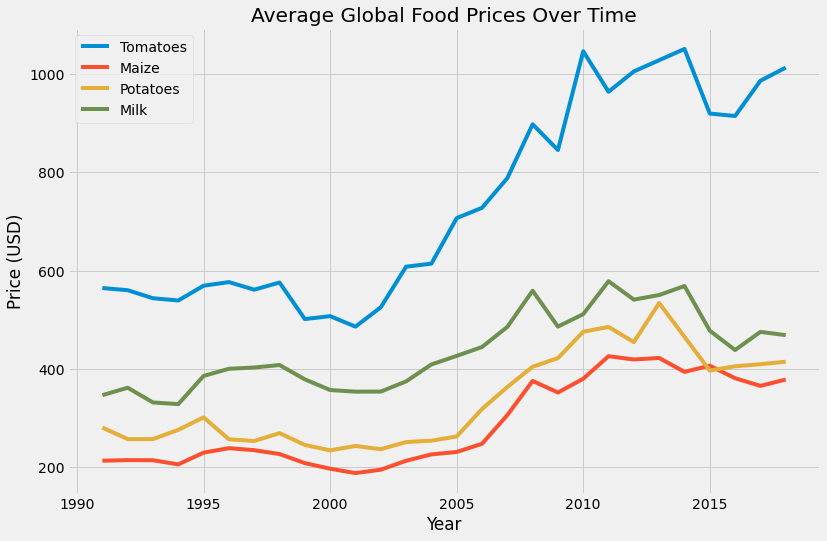

In [12]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(toms_avg, label='Tomatoes')
ax.plot(maize_avg, label='Maize')
ax.plot(pots_avg, label='Potatoes')
ax.plot(milk_avg, label='Milk')
ax.set_title('Average Global Food Prices Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Price (USD)')
ax.legend()

plt.savefig('../src/figures/prices_over_time.png')

**Note for tomorrow** make a data frame where each row is a COUNTRY and each column is a different year. the entries are average food price or something? maybe just the price of one food

then make a time series model for the countries.

worth a shot